# Analysis of Ecological Data

This practical is going to use the **generalised linear mixed effects models** and **linear mixed effects models** you have already learnt about to analyse some data (that I collected during my Master's!) from the field. 

### Background 

#### *Ae. albopictus* overview 

This study is based on the mosquito *Aedes albopictus*, also known as the "tiger mosquito" due to its stripes. *Ae. aegypti* poses a public health threat, as it is a vector of multiple harmful diseases, such as dengue and Zika Virus. Furthermore, *Ae. albopictus* is a highly invasive species with high ecological plasticity (the ability to to exploit new resources) and physiological plasticity (the ability to physiologically adjust to temperature variation). These traits have allow *Ae. aegypti* to undergo range expansion and persist following environmental modification. In turn, this increase the burden on public healthcare  of diseases carried by *Ae. albopictus*.  As many of the diseases carried by this species have no vaccine, specific treatment or cure, public health interventions rely on controlling the population size of *Ae. albopictus*. 

<img src="albopictus_image.jpeg" style = "width:300px; height: 200px"/>

#### Impact of climate on *Ae. albopictus* population size 

The mosquito lifcycle has 4 key steps: eggs, larva (juvenille mobile aquatic stage), pupa (less active aquatic stage, floats at the surface of the water), adult. As the mosquito life cycle have two aquatic stages, the availability of aquatic habitats influences adult density. The types of aquatic habitats exploited by *Ae. albopictus* depend on the land use type.  In natural habitats, tree holes and bamboo stumps etc. act as aquatic habitats and in urban areas, artificial containers such as tyres and water storage containers are used. *Ae. albopictus* prefer artificial larval habitats.

<img src="lifecycle.png" style = "width:300px; height: 300px"/>

The availability of aquatic habitats is an **unstable** abiotic factor, due to variation in the amount of rainfall and the availability of water vessels. In natural habitats, when there is less rainfall (e.g. during a period of drought), there is a decrease in the number of larval habitats. This is because, the lack of rainfall results in no new larval habitats being formed, and established larval habitats drying out. 

However, this relationship is **more complex** in developing urban areas, where periods of drought can increase the number of larval habitats. This is because, a lack of reliable piped water supply during droughts can increase water storage in buckets, and other open water containers (i.e. containers without a lid). These containers can then act as **larval habitats** for mosquitoes. Thus, periods of drought can result in a surge in the population size of (potentially disease-carrying) mosquitoes in developing urban areas, which can facilitate epidemics. 

El Nino southern oscillation events cause the strongest natural, interannual, fluctuations in climate, and cause droughts in many regions. 

### Key Question and Hypothesis 

**Question: How does land use impact larval and adult *Ae. albopictus* populations during a drought?**

**Hypotheses**
In comparison to Natural sites, Human settlements will have:
1) More larval habitats 
2) A greater abundance of *Ae. albopictus* larvae 
3) A higher density of *Ae. albopictus* adults  

### Methods 

#### Study Site 

The study was conducted at the Stability of Altered Forest Ecosystems (SAFE) Project (https://www.safeproject.net/) in Malaysian Borneo, during an El Nino drought (2019). The SAFE Project is one of the largest ecological experiments in the world, looking at how biodiversity and ecosystem function change as forests are modified by human activities. 

The diagram below represents the study sites at the SAFE project. Within this study, two land types were compared: human settlements and natural sites. The human settlements surveyed were within either a logged forest or oil palm landscape. The natural sites were in twice-logged forest, which is either continuous or fragmented. 4 replicates were conducted for each land sub type. 

<img src="SAFE.png" style = "width:700px; height: 300px"/>

#### The Surveys 

The hypotheses were tested by conducting 3 surveys at each replicate: 
1) Aquatic habitat survey 
2) Larval survey 
3) Adult population surveillance 

**1) Aquatic habitat survey**
For the aquatic habitat survey, in each replicate, **four** 10m^2 areas were surveyed for aquatic habitats. The number of aquatic habitats was recorded, alongside their water volume. 

<img src="AHS.png" style = "width:400px; height: 300px"/>

**2) Larval survey**
A larval survey was conducted on each aquatic habitat. Here, a standardized dipping method was used to determine the arval abundance. 

<img src="LS.png" style = "width:300px; height: 300px"/>

**3) Adult population surveillance**
Human landing catches (HLCs) were used to determine adult abundance. Here, the surveyors act as bait for the mosquitoes. For every mosquito that approaches the surveyer, the surveyer uses an electric aspirator to collect the mosquito (before it bites the surveyer!). Thus, at the end of the collection period, the surveyer has a mosquito-filled container. To allow comparisons of mosquito abundance to be made between replicates, the time of day and length of time surveying is standardised. 

<img src="HLC.png" style = "width:900px; height: 300px"/>

### Task
**Part 1:**
Go through the code below and make the neccessary edits, where specified. There are optional extension parts. 

**Part 2:**
Produce a 1-2 page scientific report, addressing whether the collected data supports the hypotheses outlined above. The report should include: 
* Short introduction 
* Methods (brief overview of how the data were collected, more in-depth dicussion of choice of model / analysis)
* Results (including graphs and discussion of model outputs)
* Discussion (i.e. put the results in **context**)

In [14]:
import pandas as pd #this imports the pandas library and aliases it as pd. 
#Pandas is a which is a data manipulation and analysis tool

import matplotlib.pyplot as plt #this imports the matplotlib.pyplot library and aliases it as plt. 
# matplotlib is a data visualisation tool 

import seaborn as sns # this imports seaborn and aliases it as sns.
# seaborn is a data visualization library based on matplotlib 

from pymer4.models import Lmer
# imports the Lmer function from pymer4, which is the only part of the package we need in this analysis 

**Step 1: import the dataframes**

*These sheets are being imported form google sheets*

In [9]:
# Aquatic Habitat Abundance 
sheet_id ='1dqcFrvIfF2WVPrKA83ExjGnxAiVKlloP'
AH_abundance_df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv") #format string

# Adult Mosquito Data
sheet_id_2 = '1Rqp9Bvi9K5-asZhSynNrUxYsNVSW4IWm' 
Adult_demography_df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id_2}/export?format=csv") #format string

# Adult and Larval Abundance 
sheet_id_3 = '1BHoLClHQ46arFSaRhfIAw9yJq9UDDsI6'
Adult_larval_df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id_3}/export?format=csv") #format string

**Step 2: view the dataframes**

In order to view the dataframe, you just need to type the dataframe name. Below I've done this for one of the dataframes. Edit the notebook in order to view the other dataframes. 

In [11]:
# 1) View the Aquatic Habitat Abundance dataframe
AH_abundance_df

,Land_type,Land_subtype,Replicate,Location,Number_aquatic_habitats
0,N,CF,LFE 706,1,0
1,N,CF,LFE 706,2,1
2,N,CF,LFE 706,3,0
3,N,CF,LFE 706,4,1
4,N,CF,LFE 707,1,0
5,N,CF,LFE 707,2,0
6,N,CF,LFE 707,3,0
7,N,CF,LFE 707,4,1
8,N,CF,LFE 708,1,0
9,N,CF,LFE 708,2,0


Now, edit the code to: 

In [ ]:
# 2) View the Adult Mosquito dataframe
Adult_demography_df

In [ ]:
# 3) View the Adult and Larval Abundance dataframe
Adult_larval_df

Details of of datasets: 

As shown in the study site image (in the introduction), there are two land types: **N (natural) and HS (human settlement)** 

Within each land type, there are two land subtypes.
*  **Natural (N)** sites can either be **fragmented forest (FF)** or **continuous forest (CF)**. 
* **Human settlements (HS)** can either be a **logged forest human settlement (LF)** or **oil palm (OP)**. 

Within each land subtype, there are **4 replicates**, each of which have a site name. For example, for natural (N), continous forests (CF) there are 4 replicates, named LFE 706, LFE 707, LFE 708 and LFE 709. At each replicate, sampling is taken at **4 locations**. 

**Step 3: view the data graphically**

Before conducting statistical analysis, it's useful to view the data graphically. This can give you an initial impression of trends that might be present, and thus give an indication of the types of analysis that might be appropriate.


Initial question we're going to test the hypothesis: **In comparison to natural sites, human settlements will have more larval habitats**

Initially, I made a **boxplot** to compare the number of aquatic habitats between Natural areas and Human Settlements. Note that we have used seaborn (sns) instead of matplotlib to create this plot: https://seaborn.pydata.org/generated/seaborn.boxplot.html, as seaborn is more intuative for some type of plots.


[Text(0.5, 0, 'Land Type'), Text(0, 0.5, 'Number Aquatic Habitats')]

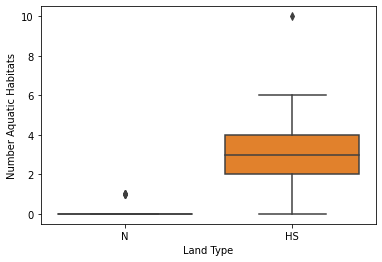

In [10]:
# 1. Boxplot comparing the number of aquatic habitats for each land type 

sns.boxplot(x='Land_type', y='Number_aquatic_habitats', data=AH_abundance_df).set(
            xlabel='Land Type', 
            ylabel='Number Aquatic Habitats')

Modify the code to make a boxplot comparing the number of aquatic habitats across **land subtypes**. 

Remember to change the x-axis label!

[Text(0.5, 0, 'Land Subtype'), Text(0, 0.5, 'Number of Aquatic Habitats')]

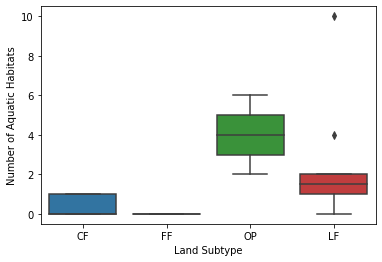

In [13]:
# 2. Boxplot comparing the number of aquatic habitats for each land subtype 
sns.boxplot(x='Land_subtype', y='Number_aquatic_habitats', data=AH_abundance_df).set(xlabel='Land Subtype', ylabel='Number of Aquatic Habitats')

**Step 3: Analyse the data**

Thus far, visually we've seen that human settlements (HS) have more aquatic habitats than natural sites (N). However, we need to perform formal statistical analysis to determine whether there is a **significant** difference. 

Here, we're going to use a GLMM (generalised linear mixed model) using the poisson distribution. Look back at the powerpoint for more information. 

#### (i) Prepare the data for analysis
We need to remove data from one of the land subtypes (named FF) from the data frame. This data needs to be excluded, because there are no aquatic habitats within that land subtype. If we left the data of all 0's in the analysis it would not provide valid results, as the Poisson distribution (used for count data) cannot be defined from zeros alone. 

Thus, we filter the dataset AH_abundance_df so that the land subtype does *not* equal FF.

In [17]:
AH_abundance_df_filtered = AH_abundance_df.loc[AH_abundance_df['Land_subtype'] != 'FF']
# The notation'!=' means 'does not equal'. 

In [18]:
# View the dataset
AH_abundance_df_filtered

,Land_type,Land_subtype,Replicate,Location,Number_aquatic_habitats
0,N,CF,LFE 706,1,0
1,N,CF,LFE 706,2,1
2,N,CF,LFE 706,3,0
3,N,CF,LFE 706,4,1
4,N,CF,LFE 707,1,0
5,N,CF,LFE 707,2,0
6,N,CF,LFE 707,3,0
7,N,CF,LFE 707,4,1
8,N,CF,LFE 708,1,0
9,N,CF,LFE 708,2,0


#### (ii) Fit a GLMM to the data
Some Biologists use R (another programming language) when working with GLMMs (generalised linear mixed effects models) and LMMs (linear mixed effects models). 

While GLMMs and LMMs can be fitted and analysed directly in Python, it's quite a lot harder to code and the results are more difficult to interpret. 

Here, we use the package *pymer4* which allows you to use R to conduct the analysis, but through the Python interface. Thus,you use R to analyse GLMMs and LMMs, without having to switch between languages. For more information, see: https://eshinjolly.com/pymer4/ and https://towardsdatascience.com/how-to-run-linear-mixed-effects-models-in-python-jupyter-notebooks-4f8079c4b589  

In [19]:
# a) Form the model
model = Lmer("Number_aquatic_habitats ~ Land_type + (1|Land_type/Land_subtype/Replicate)", data = AH_abundance_df_filtered, family = 'poisson')
# Note, we have specified: 
# Response variable: Number aquatic habitats
# Fixed effect: Land subtype 
# Random effects: Land subtype, clustered within land type 
# Lmer automatically selects the appropriate link function, which is the logarithm.

**Coding Structure:**
- The basic structure of the code, using the glmer() function, is: *Lmer("response variable ~ predictor variable + (1|biggest group / smaller group / smallest group), data = data_name, family = distribution of choice")*
- Here, the **random effects** account for the noise due to the hierarchical sampling design
- The **ordering of the random effects is important**. The random effects are written in that order (Land_type/Land_subtype/Replicate), as land type is the largest cluster, which contains multiple land subtypes & each land subtype contains multiple replicates. 
- The **order shows the clustering** (from big to small) within the sampling design 
- This attempts to **prevent** the hierarchical sampling design influencing any underlying relationship between the predictor variable (Land Type, fixed effect) and the Response variable (Number of Aquatic Habitats). 

#### (iii) Model output
View the output of the model

In [20]:
print(model.fit())

boundary (singular) fit: see help('isSingular') 

Formula: Number_aquatic_habitats~Land_type+(1|Land_type/Land_subtype/Replicate)

Family: poisson	 Inference: parametric

Number of observations: 41	 Groups: {'Replicate:(Land_subtype:Land_type)': 12.0, 'Land_subtype:Land_type': 3.0, 'Land_type': 2.0}

Log-likelihood: -65.136 	 AIC: 140.271

Random effects:

                                           Name    Var    Std
Replicate:(Land_subtype:Land_type)  (Intercept)  0.032  0.178
Land_subtype:Land_type              (Intercept)  0.026  0.162
Land_type                           (Intercept)  0.000  0.000

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE  Z-stat  P-val  Sig
(Intercept)     1.152   0.799    1.506  0.180   6.387    0.0  ***
Land_typeN     -2.158  -3.103   -1.214  0.482  -4.479    0.0  ***


#### (iv) Interpretting the Model Output

I have copy & pasted the results from the model: 

In [ ]:
#Log-likelihood: -65.136 	 AIC: 140.271 - ROW 1 

#Random effects: - ROW 2 

                                          # Name    Var    Std
#Replicate:(Land_subtype:Land_type)  (Intercept)  0.032  0.178 - ROW 3 
#Land_subtype:Land_type              (Intercept)  0.026  0.162 - ROW 4 
#Land_type                           (Intercept)  0.000  0.000 - ROW 5 

#Fixed effects: - ROW 6 

#             Estimate  2.5_ci  97.5_ci     SE  Z-stat  P-val  Sig
#(Intercept)     1.152   0.799    1.506  0.180   6.387    0.0  *** - ROW 7
#Land_typeN     -2.158  -3.103   -1.214  0.482  -4.479    0.0  *** - ROW 8

ROW 1: Model Fit
This gives the AIC which is a measure of how well the model fits the data. The smaller the AIC, the better the fit. We won't be using the AIC in this practical, however it can be used in model selection - see https://towardsdatascience.com/introduction-to-aic-akaike-information-criterion-9c9ba1c96ced if you're interested. 

ROWS 2 - 5: Random Effects
This lists the random effects accounted for in the model, and shows the Variation and Standard Deviation associated with each random effect. 

ROWS 6 - 8: Fixed Effects

NOTE: the number of * in the final column (Sig) shows whether the p-value is statistically significant: no * = no significant difference, * = P ≤ 0.05, ** = P ≤ 0.01, *** = P ≤ 0.001, **** = P ≤ 0.0001

The output of the model is slightly confusing: 
* Row 7 is not very relevent to our question here. It determines whether the intercept is significantly different from 0.
* Row 8 is highly relevent. It determines whether there is a significant difference between the number of aquatic habitats in natural sites compared to a human settlement. In the 'Sig' column is *** , thus P ≤ 0.001. This shows that there is a significant difference. As the Z-statistic is negative (z = -4.479), there are signficiantly fewer aquatic habitats in natural sites than human settlements. The Z-statistic is calculated by the Estimate (-2.158) / Standard Error (0.482). 

When reporting this formally, you would include the type of model, z-value, p-value and degrees of freedom (also in the summary (model1) output), e.g. "There were significantly fewer aquatic habitats in natural habitats than human settlements (GLMM, z = -4.479, P ≤ 0.001, df = 40)" 

Things to think about: 
* Why have we used a generalised linear mixed model (GLMM) rather than a linear mixed model (LMM)? HINT: think about why the poisson distribution is suitable for this dataset, and not the normal distribution 
* Which are the random and fixed variables?  
* Why is the poisson distribution used for this set of data? 
* What are the degrees of freedom (df), and why are they important to report? 

#### Extension 1

The hypotheses are: 
In comparison to Natural sites, Human settlements will have:
1. More larval habitats
2. A greater abundance of *Ae. albopictus* larvae  
3. A higher density of *Ae. albopictus* adults

Thus far, we have addressed the first hypothesis.  

Use the graphical and statistical techniques to test the latter two hypotheses. 

HINT: Make sure to choose the correct distribution for the data. For some guidance, see: https://towardsdatascience.com/understanding-and-choosing-the-right-probability-distributions-with-examples-5051b59b5211  
  

In [ ]:
# Testing Hypothesis 2 


In [ ]:
# Testing Hypothesis 3 


#### Extension 2

Think of some more hypotheses and test them! 

Take a look at data that has not been analysed (e.g. adult wingspan), use your biological knowledge to come up with a hypothesis. 

Hypothesis: 

In [ ]:
# Testing new hypothesis
